In [ ]:
pip install shap

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score

In [2]:
import shap

In [3]:
test_raw = pd.read_csv('test_set.csv')
train_raw = pd.read_csv('train_set.csv')
valid_raw = pd.read_csv('valid_set.csv')

In [ ]:
train_raw.columns

Index(['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender',
       'MentalHealth', 'MainBranch', 'YearsCode', 'YearsCodePro', 'Country',
       'PreviousSalary', 'HaveWorkedWith', 'ComputerSkills', 'Employed',
       'JavaScript', 'Docker', 'HTML/CSS', 'SQL', 'Git', 'AWS', 'Python',
       'PostgreSQL', 'MySQL', 'TypeScript'],
      dtype='object')

In [4]:
from data_process import convert_to_categorical
test = convert_to_categorical(test_raw)
train = convert_to_categorical(train_raw)
valid = convert_to_categorical(valid_raw)

Test Set Accuracy: 0.78
Validation Set Accuracy: 0.78
Recall (Test Set): 0.78
Recall (Validation Set): 0.79
Confusion Matrix (Test Set):
[[3926 1133]
 [1337 4624]]
Confusion Matrix (Validation Set):
[[4042 1146]
 [1234 4597]]


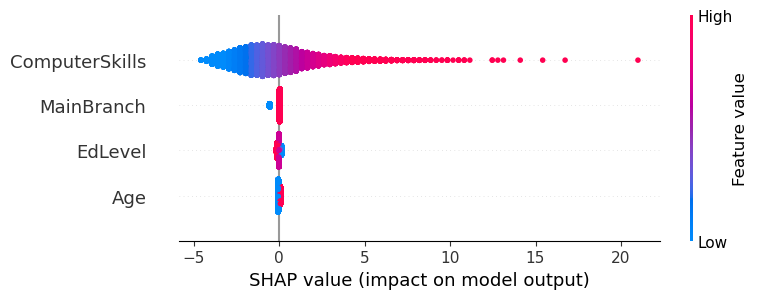

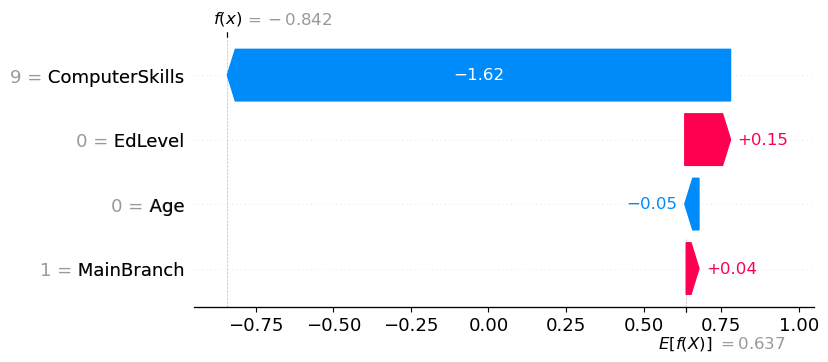

In [5]:

# Build Model(Picked top 4 highest corr predictors from heatmap above)
# -- ComputerSkills/Age/MainBranch/EdLevel
X_test = test[['ComputerSkills','Age','MainBranch','EdLevel']]
y_test = test['Employed']
X_train = train[['ComputerSkills','Age','MainBranch','EdLevel']]
y_train = train['Employed']
X_valid = valid[['ComputerSkills','Age','MainBranch','EdLevel']]
y_valid = valid['Employed']

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_test_pred = logmodel.predict(X_test)
y_valid_pred = logmodel.predict(X_valid)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Set Accuracy: {valid_accuracy:.2f}")

# Recall for the test set
test_recall = recall_score(y_test, y_test_pred)
print(f"Recall (Test Set): {test_recall:.2f}")

# Recall for the validation set
valid_recall = recall_score(y_valid, y_valid_pred)
print(f"Recall (Validation Set): {valid_recall:.2f}")

# Confusion Matrix
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(test_confusion_matrix)

# Confusion matrix for the validation set
valid_confusion_matrix = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix (Validation Set):")
print(valid_confusion_matrix)

# Create a SHAP explainer
explainer = shap.Explainer(logmodel, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualization
# Summary Plot for the test set
shap.summary_plot(shap_values, X_test)

# Waterfall plot for the first instance in the test set
shap.plots.waterfall(shap_values[0])

In [6]:

# Get the coefficients
coefficients = logmodel.coef_[0]

# Create a DataFrame for easier interpretation
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

# Sort the features by the absolute value of their coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                Coefficient  Absolute Coefficient
MainBranch         0.588863              0.588863
ComputerSkills     0.327685              0.327685
Age                0.123757              0.123757
EdLevel           -0.078492              0.078492


### With more features

In [7]:
from data_process import split_and_drop
X_train, y_train = split_and_drop(train, version = 'default')
X_valid, y_valid = split_and_drop(valid, version = 'default')
X_test, y_test = split_and_drop(test, version = 'default')

Test Set Accuracy: 0.68
Validation Set Accuracy: 0.66
Confusion Matrix (Test Set):
[[2378 2681]
 [ 849 5112]]
Confusion Matrix (Validation Set):
[[2348 2840]
 [ 864 4967]]
Recall (Test Set): 0.86
Recall (Validation Set): 0.85


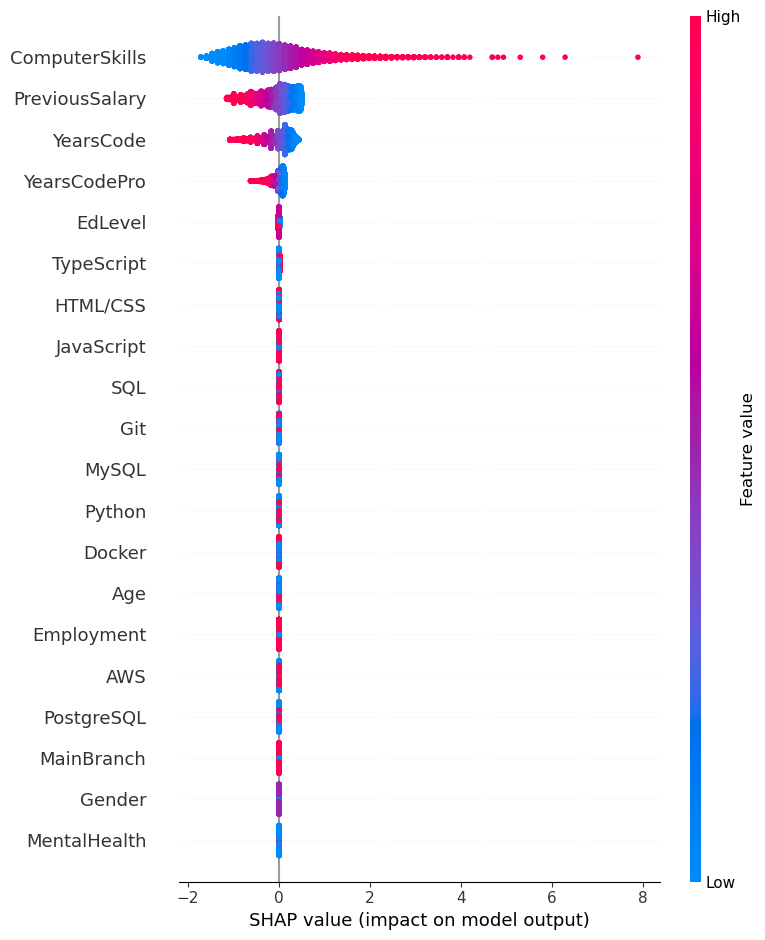

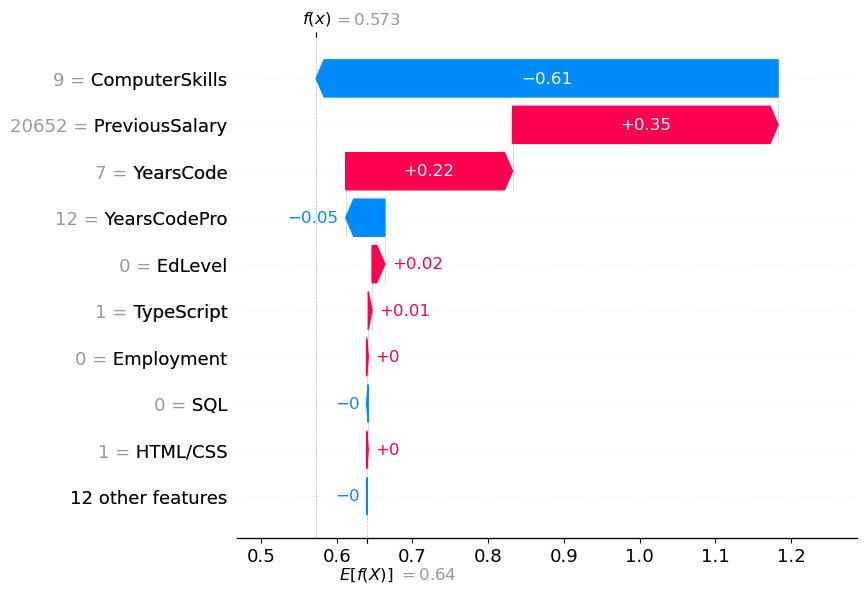

In [8]:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_test_pred = logmodel.predict(X_test)
y_valid_pred = logmodel.predict(X_valid)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Set Accuracy: {valid_accuracy:.2f}")

# Confusion Matrix
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(test_confusion_matrix)

# Confusion matrix for the validation set
valid_confusion_matrix = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix (Validation Set):")
print(valid_confusion_matrix)

# Recall for the test set
test_recall = recall_score(y_test, y_test_pred)
print(f"Recall (Test Set): {test_recall:.2f}")

# Recall for the validation set
valid_recall = recall_score(y_valid, y_valid_pred)
print(f"Recall (Validation Set): {valid_recall:.2f}")

# Create a SHAP explainer
explainer = shap.Explainer(logmodel, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualization
# Summary Plot for the test set
shap.summary_plot(shap_values, X_test)

# Waterfall plot for the first instance in the test set
shap.plots.waterfall(shap_values[0])

In [9]:

# Get the coefficients
coefficients = logmodel.coef_[0]

# Create a DataFrame for easier interpretation
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

# Sort the features by the absolute value of their coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                Coefficient  Absolute Coefficient
ComputerSkills     0.123258              0.123258
YearsCode         -0.030228              0.030228
YearsCodePro      -0.015113              0.015113
EdLevel           -0.008974              0.008974
TypeScript         0.008676              0.008676
JavaScript         0.006061              0.006061
HTML/CSS           0.005377              0.005377
SQL                0.003845              0.003845
Git               -0.002621              0.002621
Employment        -0.002467              0.002467
Gender            -0.002263              0.002263
MySQL              0.001735              0.001735
Python            -0.001553              0.001553
Docker             0.001351              0.001351
MainBranch        -0.001236              0.001236
Age               -0.001029              0.001029
AWS                0.000628              0.000628
PostgreSQL         0.000601              0.000601
MentalHealth      -0.000146              0.000146


### drop the computerSkills

In [10]:
from data_process import split_and_drop
X_train, y_train = split_and_drop(train, version = 'drop2')
X_valid, y_valid = split_and_drop(valid, version = 'drop2')
X_test, y_test = split_and_drop(test, version = 'drop2')

Test Set Accuracy: 0.77
Validation Set Accuracy: 0.76
Confusion Matrix (Test Set):
[[3732 1327]
 [1259 4702]]
Confusion Matrix (Validation Set):
[[3837 1351]
 [1267 4564]]
Recall (Test Set): 0.79
Recall (Validation Set): 0.78


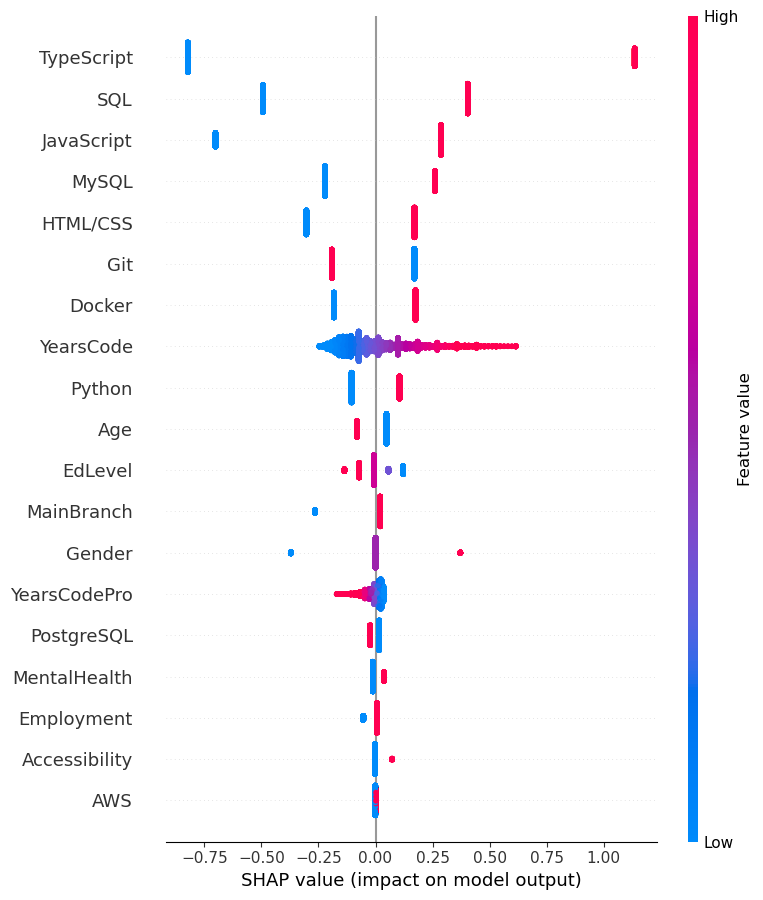

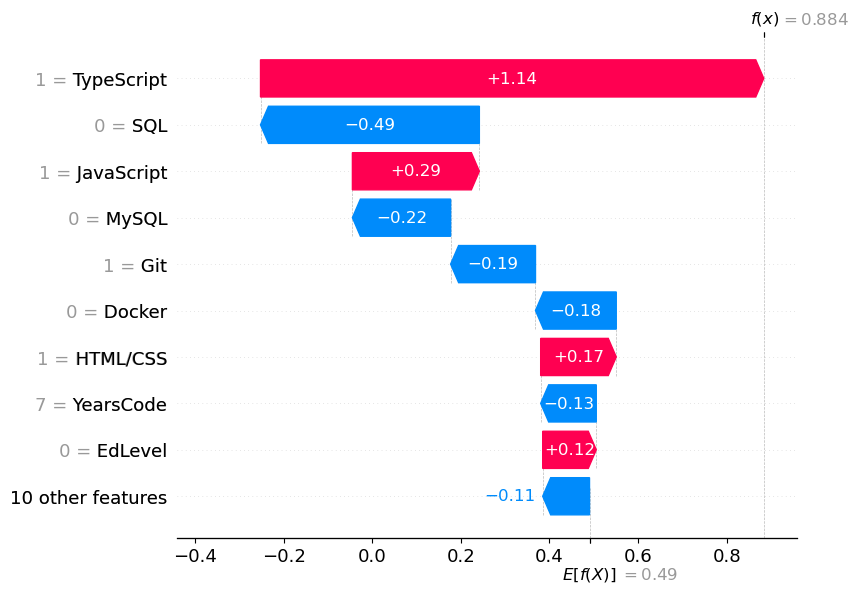

In [11]:

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_test_pred = logmodel.predict(X_test)
y_valid_pred = logmodel.predict(X_valid)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {test_accuracy:.2f}")
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Set Accuracy: {valid_accuracy:.2f}")

# Confusion Matrix
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):")
print(test_confusion_matrix)

# Confusion matrix for the validation set
valid_confusion_matrix = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix (Validation Set):")
print(valid_confusion_matrix)
# Recall for the test set
test_recall = recall_score(y_test, y_test_pred)
print(f"Recall (Test Set): {test_recall:.2f}")

# Recall for the validation set
valid_recall = recall_score(y_valid, y_valid_pred)
print(f"Recall (Validation Set): {valid_recall:.2f}")
# Create a SHAP explainer
explainer = shap.Explainer(logmodel, X_train)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Visualization
# Summary Plot for the test set
shap.summary_plot(shap_values, X_test)

# Waterfall plot for the first instance in the test set
shap.plots.waterfall(shap_values[0])

In [12]:
# Get the coefficients
coefficients = logmodel.coef_[0]

# Create a DataFrame for easier interpretation
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=['Coefficient'])

# Sort the features by the absolute value of their coefficient
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

               Coefficient  Absolute Coefficient
TypeScript        1.957899              1.957899
JavaScript        0.987814              0.987814
SQL               0.897853              0.897853
MySQL             0.481827              0.481827
HTML/CSS          0.473791              0.473791
Gender            0.371228              0.371228
Git              -0.361338              0.361338
Docker            0.357377              0.357377
MainBranch        0.284357              0.284357
Python            0.210178              0.210178
Age              -0.129608              0.129608
Accessibility     0.075237              0.075237
EdLevel          -0.064310              0.064310
Employment        0.059083              0.059083
MentalHealth      0.048129              0.048129
PostgreSQL       -0.039521              0.039521
YearsCode         0.017210              0.017210
YearsCodePro     -0.004107              0.004107
AWS               0.003382              0.003382


### Recursive Feature Elimination (RFE):

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [27]:
# Create the RFE object and rank each pixel
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=1, step=1)
rfe = rfe.fit(X_train, y_train)


In [29]:
# Create the RFE object and rank each feature
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Select the top-ranked features based on RFE
selected_features_indices = np.argsort(feature_ranking)[:4]
selected_features = X_train.columns[selected_features_indices]

# Create a new X_train with selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
X_valid_rfe = X_valid[selected_features]

# Train a logistic regression model with RFE-selected features
logmodel_rfe = LogisticRegression()
logmodel_rfe.fit(X_train_rfe, y_train)

# Predictions on the test and validation sets
y_test_pred_rfe = logmodel_rfe.predict(X_test_rfe)
y_valid_pred_rfe = logmodel_rfe.predict(X_valid_rfe)

# Calculate accuracy for the RFE-based model
test_accuracy_rfe = accuracy_score(y_test, y_test_pred_rfe)
valid_accuracy_rfe = accuracy_score(y_valid, y_valid_pred_rfe)

# Confusion Matrix for the RFE-based model
test_confusion_matrix_rfe = confusion_matrix(y_test, y_test_pred_rfe)
valid_confusion_matrix_rfe = confusion_matrix(y_valid, y_valid_pred_rfe)

# Print the results
print(f"Logistic Regression Model with RFE-selected Features:")
print(f"Test Set Accuracy: {test_accuracy_rfe:.2f}")
print(f"Validation Set Accuracy: {valid_accuracy_rfe:.2f}")
print("Confusion Matrix (Test Set):")
print(test_confusion_matrix_rfe)
print("Confusion Matrix (Validation Set):")
print(valid_confusion_matrix_rfe)

# Recall for the test set
test_recall = recall_score(y_test, y_test_pred_rfe)
print(f"Recall (Test Set): {test_recall:.2f}")

# Recall for the validation set
valid_recall = recall_score(y_valid, y_valid_pred_rfe)
print(f"Recall (Validation Set): {valid_recall:.2f}")


Logistic Regression Model with RFE-selected Features:
Test Set Accuracy: 0.76
Validation Set Accuracy: 0.76
Confusion Matrix (Test Set):
[[3614 1445]
 [1187 4774]]
Confusion Matrix (Validation Set):
[[3718 1470]
 [1187 4644]]
Recall (Test Set): 0.80
Recall (Validation Set): 0.80
